In [1]:
import autograd
import numpy as _np
import numpy.core
import numpy.ma
import numpy.typing
import autograd.numpy as np

import sys

sys.modules["numpy"] = np

np.ma = _np.ma
np.dtype = _np.dtype
np.typing = _np.typing
np.__version__ = _np.__version__
np.lib = _np.lib
np.typecodes = _np.typecodes

In [2]:
import sdf

from sdf import *

f = sphere(1) & box(1.5)

c = cylinder(0.5)
f -= c.orient(X) | c.orient(Y) | c.orient(Z)

ds = f(
    np.array(
        [
            [0.0, 0.0, 0.0],
            [1.0, 0.0, 0.0],
            [1.0, 1.0, 1.0],
        ]
    )
)

print(ds)

f.save("out.stl", step=0.1)

[[0.5       ]
 [0.5       ]
 [0.73205081]]
min -0.84543, -0.84543, -0.84543
max 0.845431, 0.845431, 0.845431
step 0.1, 0.1, 0.1
4913 samples in 1 batches with 12 workers
  100% (1 of 1) [##############################] 0:00:00 0:00:00    
0 skipped, 0 empty, 1 nonempty
3208 triangles in 0.0335019 seconds


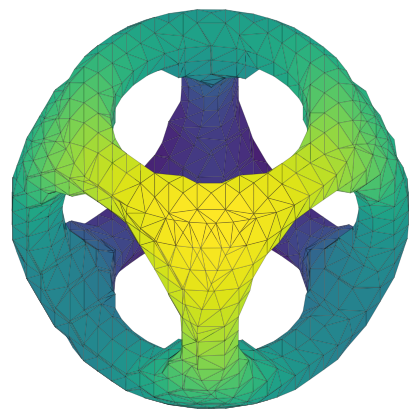

In [3]:
from mpl3d import glm
from mpl3d.mesh import Mesh
from mpl3d.camera import Camera
import meshio
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0,0,1,1], xlim=[-1,+1], ylim=[-1,+1], aspect=1)
ax.axis("off")

camera = Camera("ortho", theta=45.0, phi=45.0, scale=1.5)
mesh = meshio.read("out.stl")
vertices = mesh.points
faces = mesh.cells[0].data
vertices = glm.fit_unit_cube(vertices)
mesh = Mesh(ax, camera.transform, vertices, faces,
            cmap=plt.get_cmap("viridis"), edgecolors=(0, 0, 0, 0.25))
plt.show()

In [4]:
import meshio

mesh = meshio.read("out.stl")
mesh

<meshio mesh object>
  Number of points: 1596
  Number of cells:
    triangle: 3208

In [5]:
mesh.points

array([[-0.74543005, -0.6454301 , -0.16246288],
       [-0.74543005, -0.65033096, -0.14543006],
       [-0.7487799 , -0.6454301 , -0.14543006],
       ...,
       [ 0.7396211 ,  0.6545699 ,  0.15456994],
       [ 0.71098894,  0.6545699 ,  0.25456995],
       [ 0.6672581 ,  0.6545699 ,  0.35456994]], dtype=float32)

In [8]:
f(mesh.points)

array([[-0.00068016],
       [-0.0001269 ],
       [-0.00079971],
       ...,
       [-0.00030353],
       [-0.00061373],
       [-0.00029255]])

In [14]:
from autograd import grad
grad(f)(mesh.points)

TypeError: Grad only applies to real scalar-output functions. Try jacobian, elementwise_grad or holomorphic_grad.